In [1]:
# import necessary modules
import string
import pandas as pd
import matplotlib.pyplot as plt
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Prepare data

In [2]:
# read data and show the data
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# drop the last three columns, and rename the first two
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [4]:
# convert label to numerical value
data['label_num'] = data.label.map({'ham':0, 'spam':1})
# Observe the data, see that spam messages might be longer & has more digit information

In [5]:
# split to train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], data['label_num'], test_size=0.3)

In [6]:
# preprocess & extract features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
vectorizer.fit(X_train)
features_train = vectorizer.transform(X_train)
features_test = vectorizer.transform(X_test)
import sklearn.externals.joblib as jl
# save the vectorizer
jl.dump(vectorizer,'vec.pkl')

['vec.pkl']

## 2. Apply machine learning methods

In [9]:
# use different machine learning methods
from sklearn.metrics import accuracy_score
accuracy = []
predtime=[]

### 2.1 Apply KNN-K Nearest Neighbors

the accuracy of 1-Nearest Neighbors is : 0.950359
the accuracy of 2-Nearest Neighbors is : 0.949761
the accuracy of 3-Nearest Neighbors is : 0.938995
the accuracy of 4-Nearest Neighbors is : 0.936005
the accuracy of 5-Nearest Neighbors is : 0.931220
the accuracy of 6-Nearest Neighbors is : 0.926435
the accuracy of 7-Nearest Neighbors is : 0.925837
the accuracy of 8-Nearest Neighbors is : 0.922847
the accuracy of 9-Nearest Neighbors is : 0.920455
the accuracy of 10-Nearest Neighbors is : 0.918062
the best classification accuracy for KNN is : 0.950359


Text(0.5,1,'the classification accuracy for each k')

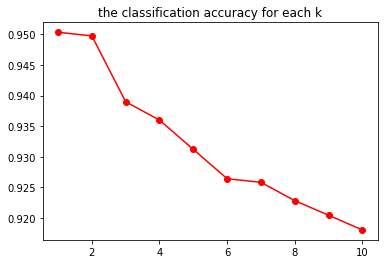

In [10]:
# do the classification  using KNN
from sklearn.neighbors import KNeighborsClassifier
# we would control number of n_neighbors & whether or not using weight option
N = range(1,11)
# accuracy results
knn_acc = []
nlist = []
for n in N:
    KNN = KNeighborsClassifier(n_neighbors=n, weights = 'distance')
    KNN.fit(features_train, Y_train)
    Predict_test = KNN.predict(features_test)
    knn_acc.append(accuracy_score(Y_test,Predict_test))
    nlist.append(n)
    print("the accuracy of %d-Nearest Neighbors is : %f" % (n, accuracy_score(Y_test,Predict_test)))
print("the best classification accuracy for KNN is : %f" % np.max(knn_acc))

plt.plot(nlist,knn_acc,'ro-');plt.title("the classification accuracy for each k")

In [45]:
KNN = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
KNN.fit(features_train, Y_train)
t1=time.time()
Predict_test = KNN.predict(features_test)
t2=time.time()
t1nn=t2-t1
print ("the time of prediction of 1nn is %f second"%t1nn)
predtime.append(t1nn)
accuracy.append(('KNN',[np.max(knn_acc)]))

the time of prediction of 1nn is 0.104708 second


### 2.2 Neural Networks- Multi-layer Perceptron classifier

In [11]:
# Use neural network
from sklearn.neural_network import MLPClassifier

# test effect on different activation function
function = ['logistic', 'tanh', 'relu']
acc = []
for fun in function:
    print("iterations for activation function as %s" % fun)
    DNN = MLPClassifier(hidden_layer_sizes = (256,256), activation = fun, solver='adam',
              shuffle=True,validation_fraction=0.1)
    DNN.fit(features_train, Y_train)
    Predict_test = DNN.predict(features_test)
    mlp_acc = accuracy_score(Y_test,Predict_test)
    acc.append(mlp_acc)

iterations for activation function as logistic
iterations for activation function as tanh
iterations for activation function as relu


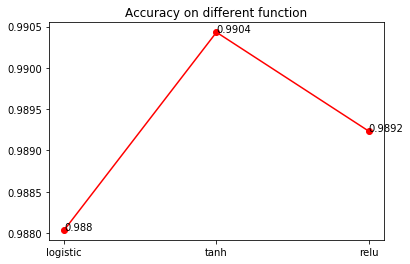

In [14]:
plt.plot(np.arange(3),acc, 'ro-')
plt.xticks(np.arange(3),function)
plt.title('Accuracy on different function')
for i,j in zip(np.arange(3),acc):
    plt.annotate(str(round(j,4)),xy=(i,j))
plt.show()

In [15]:
# test effect on different number of hidden layers
layer_size = 64
acc = []
for num_layers in range(1,9):
    hidden_layer_sizes = np.ones(num_layers,dtype=int) * layer_size
    DNN = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation = 'logistic')
    DNN.fit(features_train, Y_train)
    Predict_test = DNN.predict(features_test)
    mlp_acc = accuracy_score(Y_test,Predict_test)
    acc.append(mlp_acc)

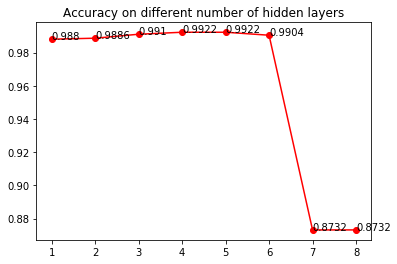

In [16]:
plt.plot(range(1,9),acc, 'ro-')
plt.title('Accuracy on different number of hidden layers')
for i,j in zip(range(1,9),acc):
    plt.annotate(str(round(j,4)),xy=(i,j))
plt.show()

In [17]:
# test effect on different hidden layer sizes
layer_sizes = [2, 8, 16, 32, 64, 128, 256, 512]
acc = []
for layer_size in layer_sizes:
    hidden_layer_sizes = np.ones(3,dtype=int) * layer_size
    model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation = 'logistic')
    model.fit(features_train, Y_train)
    Predict_test = model.predict(features_test)
    mlp_acc = accuracy_score(Y_test,Predict_test)
    acc.append(mlp_acc)

/Users/eric/anaconda2/envs/p36workshop/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


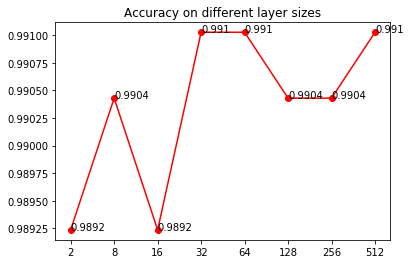

In [18]:
plt.plot(range(1,9),acc, 'ro-')
plt.title('Accuracy on different layer sizes')
plt.xticks(range(1,9), layer_sizes)
for i,j in zip(range(1,9),acc):
    plt.annotate(str(round(j,4)),xy=(i,j))
plt.show()


In [ ]:
model = MLPClassifier(hidden_layer_sizes = (64,64,64), activation = 'logistic')
model.fit(features_train, Y_train)



t1=time.time()
Predict_test = model.predict(features_test)
t2=time.time()

mlp_acc = accuracy_score(Y_test,Predict_test)

tdnn=t2-t1
predtime.append(tdnn)
accuracy.append(('DNN',[np.max(acc)]))
print("the time of prediction of dnn is %f second"%tdnn)
print("the accuracy of dnn is %f"%mlp_acc)


jl.dump(model,'DNN.pkl')

### 2.3 Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB 
MNB = MultinomialNB(alpha=0.2)
MNB.fit(features_train, Y_train)
t1=time.time()
MNBpred = MNB.predict(features_test)
t2=time.time()
tgnb=t2-t1
print("the time of prediction of GNB is %f second"%tgnb)
MNBacc = accuracy_score(Y_test,MNBpred)
predtime.append(tgnb)
print("the classification accuracy of Multinomial Naive Bayes is: %f" % MNBacc)
accuracy.append(('MulNB',[MNBacc]))

the time of prediction of GNB is 0.000637 second
the classification accuracy of Multinomial Naive Bayes is: 0.986842


### 2.4 Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
LRmdl = LogisticRegression(solver='liblinear', penalty='l1')
LRmdl.fit(features_train, Y_train)
t1=time.time()
LRpred = LRmdl.predict(features_test)
t2=time.time()
tlr=t2-t1
print("the time of prediction of LR is %f second"%tlr)
predtime.append(tlr)
LRacc = accuracy_score(Y_test, LRpred)
print("the classification accuracy of Logistic Regression is: %f" % LRacc)
accuracy.append(('Logistic Regression',[LRacc]))

the time of prediction of LR is 0.000282 second
the classification accuracy of Logistic Regression is: 0.979067


### 2.5 Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
TREE = DecisionTreeClassifier(min_samples_split=7, random_state=128)
TREE.fit(features_train, Y_train)
t1=time.time()
TREEpred = TREE.predict(features_test)
t2=time.time()
tdt=t2-t1
print("the time of prediction of DT is %f second"%tdt)
predtime.append(tdt)
TREEacc = accuracy_score(Y_test, TREEpred)
print("the classification accuracy of Decision Tree is: %f" % TREEacc)
accuracy.append(('Decision Tree',[TREEacc]))

the time of prediction of DT is 0.001034 second
the classification accuracy of Decision Tree is: 0.968900


### 2.6 Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(n_estimators=31, random_state=128)
Forest.fit(features_train, Y_train)
t1=time.time()
Forest_pred = Forest.predict(features_test)
t2=time.time()
trf=t2-t1
print("the time of prediction of RF is %f second"%trf)
predtime.append(trf)
Forestacc = accuracy_score(Y_test, Forest_pred)
print("the classification accuracy of Random Forest is: %f" % Forestacc)
accuracy.append(('Random Forest',[Forestacc]))

the time of prediction of RF is 0.042470 second
the classification accuracy of Random Forest is: 0.971890


### 2.7 Support Vector Machine

In [51]:
from sklearn.svm import SVC
SVM = SVC(kernel='sigmoid', gamma=1.0)
SVM.fit(features_train, Y_train)
t1=time.time()
SVM_pred = SVM.predict(features_test)
t2=time.time()
tsvm=t2-t1
print("the time of prediction of SVM is %f second"%tsvm)
predtime.append(tsvm)

SVMacc = accuracy_score(Y_test, SVM_pred)
print("the classification accuracy of Support Vector Machine is: %f" % SVMacc)
accuracy.append(('SVC',[SVMacc]))

the time of prediction of SVM is 0.040324 second
the classification accuracy of Support Vector Machine is: 0.933014


### 2.8 Ada Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(n_estimators=62, random_state=128)
ADB.fit(features_train, Y_train)
t1=time.time()
ADB_pred = ADB.predict(features_test)
t2=time.time()
tab=t2-t1
print("the time of prediction of Ada Boost is %f second"%tab)
predtime.append(tab)

ADBacc = accuracy_score(Y_test, ADB_pred)
print("the classification accuracy of Ada Boost is: %f" % ADBacc)
accuracy.append(('AdaBoost',[ADBacc]))

the time of prediction of Ada Boost is 0.016216 second
the classification accuracy of Ada Boost is: 0.970694


### 2.9 Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(n_estimators=9, random_state=128)
Bag.fit(features_train, Y_train)
t1=time.time()
Bag_pred = Bag.predict(features_test)
t2=time.time()
tbag=t2-t1
print("the time of prediction of Bagging is %f second"%tbag)
predtime.append(tbag)

Bagacc = accuracy_score(Y_test, Bag_pred)
print("the classification accuracy of Bagging is: %f" % Bagacc)
accuracy.append(('Bagging',[Bagacc]))

the time of prediction of Bagging is 0.019848 second
the classification accuracy of Bagging is: 0.972488


## 3. Compare Accuracy and Efficiency of each Classifier

In [54]:
clfs = {'KNN' : KNN,'DNN' : DNN, 'MNB': MNB, 'LR': LRmdl, 'DeTree': TREE,'RanFore': Forest, 'SVC' : SVM, 'AdaBoost': ADB, 'Bagg': Bag}
df = pd.DataFrame.from_items(accuracy, orient='index', columns=['Score'])
df

/Users/eric/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score
KNN,0.949761
DNN,0.991029
MulNB,0.986842
Logistic Regression,0.979067
Decision Tree,0.968900
Random Forest,0.971890
SVC,0.933014
AdaBoost,0.970694
Bagging,0.972488


In [55]:
Ptime=pd.DataFrame(predtime)

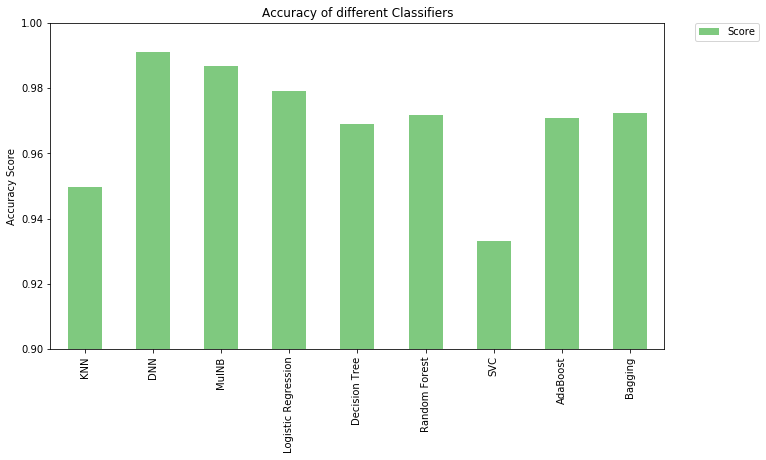

In [56]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of different Classifiers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

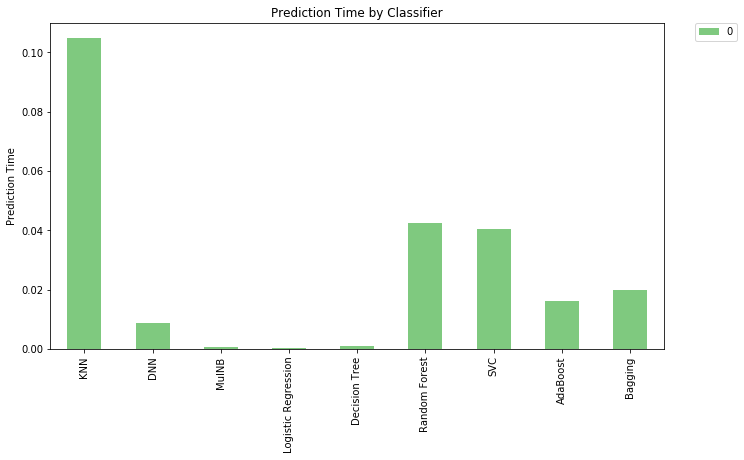

In [57]:
Ptime.plot(kind='bar', figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Prediction Time')
plt.title('Prediction Time by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)